## <center>Wrangle and Analysis of WeRateDogs Twitter Data </center>
<center> by </center>
<center>Geetha Nandagopal</center>

**Project Intro:**<br>
Goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

Steps involved:
-  Gather - Gather data from three different source.
-  Assess - Assess the gathered data visually and programmatically for atleast eight qualityissues and two tidiness issues.
-  clean - Clean all issues identified in the assess phase.
-  Storing, Analyzing, and Visualizing  the Data

### Table of Contents
-  [Gather](#gather)
    
-  [Assess](#assess)
    -  [List of Quality and Tidiness Issues](#a)
    
-  [Clean](#clean)

-  [Store, Analyze, and Visualize the Data](#store)
    -  [Insights](#insights)
        -  [Descriptive Statistical Analysis](#dsa)
        -  [Which dog has the highest rating?](#dograting)
        -  [Which tweet/dog is most popular with most favorite count?](#dogfav)
        -  [which tweet/dog  has the most retweets?](#dogretweet)
    -  [Visualization](#visual)
        -  [Top 20 dog breeds by rating](#toprating)
        -  [Top 20 dog breeds by favorite count](#topfav)
        -  [Retweet and favorite count by dog stages](#dogstages)
        -  [Which month has the most tweets?](#month)

## Gather<a name="gather"></a>

In [1]:
# import the necessary libraries

import datetime as dt
import pandas as pd
import numpy as np
import re
import warnings
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
# get image data using the url through requests library
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
#get the contents from the response object returned from requests

with open('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)

In [4]:
#store the data in the image_file dataframe
image_file=pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
image_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#get the authentication to access twitter data
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
api



In [7]:
# set the variables
samp=[]
tweet_ids= archive_df['tweet_id']
#len(tweet_ids)


In [8]:
# read the data using twitter API and store it in a dictionary
for i in tweet_ids:
    try:
        page = api.get_status(i,wait_on_rate_limit=True,
                                wait_on_rate_limit_notify=True)
        fav_count=page['favorite_count']
        retweet_count= page['retweet_count']
        samp.append({'tweet_id':i,
                     'favorite_count': fav_count,
                     'retweet_count':retweet_count})
    except:
        print('error:' +str(i))

error:888202515573088257
error:873697596434513921
error:869988702071779329
error:866816280283807744
error:861769973181624320
error:845459076796616705
error:842892208864923648
error:837012587749474308
error:827228250799742977
error:802247111496568832
error:775096608509886464
Rate limit reached. Sleeping for: 712
Rate limit reached. Sleeping for: 716


In [9]:
#copy the data from dictionary to 'tweet_json.txt'
samp = pd.DataFrame(samp, columns=['tweet_id','favorite_count','retweet_count'])
samp.to_csv('tweet_json.txt')

In [6]:
#store the data from 'tweet_json' to tweet_df dataframe
tweet_df = pd.read_csv('tweet_json.txt')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Unnamed: 0        2345 non-null int64
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [7]:
#shape of all three dataframes
archive_df.shape,image_file.shape,tweet_df.shape

((2356, 17), (2075, 12), (2345, 4))

## Assess <a name="assess"></a>

In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Unnamed: 0        2345 non-null int64
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [11]:
archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Daisy             7
Buddy             7
Toby              7
an                7
Dave              6
Bella             6
Jack              6
Oscar             6
Milo              6
Scout             6
Koda              6
Rusty             6
Stanley           6
Jax               6
Leo               6
Chester           5
               ... 
Lillie            1
Dex               1
Acro              1
life              1
Meatball          1
Zoe               1
Lucia             1
Zuzu              1
Sobe              1
Nugget            1
Iroh              1
Aja               1
Bloop             1
Arlen             1
Augie             1
Covach            1
Anna              1
Jed               1
Chuck             1


In [12]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Quality and Tidiness Issues: <a name="a"></a>


<font color=blue>     
### Quality Issues:<br>
Identifying the issues with the content of the dataframes.

-  change timestamp column from string object to datatime object.
-  Parse the timestamp into date and time. Extract day, month, year from date and hour from time.
-  Names of dogs mispelled in the name column.
-  Missing values in 'name' and dog stages showing as 'None'
-  Make the source column more readable.
-  Fix the rating numerator by finding second occurences of ##/## and replacing. 
-  The retweeted_status_id shows there are 181 retweets. Exclude those retweets and keep only the original tweets.
-  Exclude tweets with no images. Image dataframe has only 2075 rows and archive dataframe has 2376 rows.

    
### Tidiness:

Identifying the issues with the structure of the dataset.

-  Condense the dog stage into one column filled with values rather than four columns.
-  Condense the dog breed predictions column to one column.
-  There is no need for unnamed 0 column from image_df dataframe.
-  Drop columns that are not needed & rearrange column order for an easier read
-  Fix the column datatypes:
    *  Rating columns need to be converted to float values.
    *  tweet_id column  from int to string object.
    *  img_num column from float to int

## Clean the data: <a name="clean"></a>


In [15]:
# get a copy of each dataframe
archive_clean = archive_df
image_clean = image_file
tweet_clean = tweet_df


#### Define
Changing timestamp datatype from string object to datetime object
#### Code

In [16]:
#change the timestamp datatype to datetime object
archive_clean['timestamp'] =pd.to_datetime(archive_clean.timestamp)

#### Test

In [17]:
# Test the timestamp column datatype
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**Define**

Parse the timestamp column into date and time. Extract day of the week, month,year and hour repectively.

**Code**

In [18]:
#parse date and time for timestamp column
import time
archive_clean['date'] = pd.to_datetime(archive_clean['timestamp'].dt.date)
archive_clean['time'] = pd.to_datetime(archive_clean['timestamp'].dt.time,format='%H:%M:%S')

#extract hour from the time column
archive_clean['hour'] = archive_clean.time.apply(lambda x: x.hour)

#extract day, month and year from date column
archive_clean['day'] = archive_clean['date'].dt.day
archive_clean['month'] = archive_clean['date'].dt.month
archive_clean['year'] = archive_clean['date'].dt.year

In [19]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                    

We can delete the timestamp column from the dataframe as we no longer need that column 

In [20]:
archive_clean.drop('timestamp',axis=1,inplace=True)

**Test**

In [21]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,doggo,floofer,pupper,puppo,date,time,hour,day,month,year
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,None,None,None,None,2017-08-01,1900-01-01 16:23:56,16,1,8,2017
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,None,None,None,None,2017-08-01,1900-01-01 00:17:27,0,1,8,2017
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,None,None,None,None,2017-07-31,1900-01-01 00:18:03,0,31,7,2017
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,None,None,None,None,2017-07-30,1900-01-01 15:58:51,15,30,7,2017
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,None,None,None,None,2017-07-29,1900-01-01 16:00:24,16,29,7,2017


####  Define
Dog names mispelled/missing. The dog name that are starting with lowercase letters doesn't seem to be actual names.
Replace them with Nan.
#### Code

In [22]:
# check and display names with lower cases
faulty_names = archive_clean[archive_clean.name.str.islower()].name
print(faulty_names)

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

As these don't look like names, we can replace them name with Nan.

In [23]:
#replace them with nan
archive_clean['name'].replace(archive_clean[archive_clean.name.str.islower()].name ,np.nan, inplace=True)
#archive_clean['name'].replace('None',np.nan,inplace= True)

#### Test

In [24]:
#test if the names have been replaced
len(archive_clean[archive_clean.name.isnull()]) == len(faulty_names)

True

** Define **<br>

Replace the 'None' with Nan.

**Code**

In [25]:
# look for missing names
archive_clean.name.value_counts()

None            745
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
Sadie             8
Daisy             7
Toby              7
Bailey            7
Buddy             7
Rusty             6
Jack              6
Dave              6
Koda              6
Milo              6
Jax               6
Leo               6
Oscar             6
Stanley           6
Scout             6
Bella             6
Oakley            5
Alfie             5
Finn              5
Louis             5
               ... 
Orion             1
Mutt              1
Mollie            1
Lillie            1
Dex               1
Acro              1
Shiloh            1
Lucia             1
Tove              1
Peanut            1
Rufio             1
Nugget            1
Iroh              1
Bloop             1
Arlen             1
Augie             1
Covach            1
Anna              1
Jed               1


In [26]:
# Replace 'None' with Nan
archive_clean['name'].replace('None',np.nan,inplace= True)

** Test **

In [27]:
# test if 'None is replaced with nan
archive_clean[archive_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,doggo,floofer,pupper,puppo,date,time,hour,day,month,year


####  Define

Make the source column values more readable by deleting the url
#### Code

In [28]:
# make the source column more readble
archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                'iPhone',inplace=True)

archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                'Vine - Make a Scene',inplace=True)

archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                'Twitter Web Client',inplace=True)

archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                'TweetDeck',inplace=True)

#### Test

In [29]:
archive_clean.source.value_counts()

iPhone                 2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

####  Define
Tweet's text with more than one occurences of ##/## has the rating numerator wrong. Fix the numerator by finding the second occurence of ##/##  and replace the numerator.
#### Code

In [30]:
# find the tweets with more than one occurences of ##/##
archive_clean.text.str.extractall( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")


,,0
,match,
55,0,17/10 is an emotional impulse rating. More lik...
313,0,"960/00 isn't a valid rating, 13/10"
561,0,12/10 and 11/10
766,0,12/10 and 11/10
784,0,"9/11 search dog, and our second ever 14/10."
860,0,8/10 (would b 11/10
1007,0,10/10 and 7/10
1068,0,"9/11 search dog, and our second ever 14/10."
1165,0,4/20 from the squad! 13/10


In [31]:
#save the tweet_id's of the above result
warnings.filterwarnings("ignore", 'This pattern has match groups')
faulty_rating_id = archive_clean[archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tweet_id


The tweets with the above tweet id's have more than one occurences ##/##. Let me find the second occurence and change the numerator.


In [32]:

for ids in faulty_rating_id:
    txt = archive_clean[archive_clean.tweet_id == ids].text
    #print(txt)
    rating_list = txt.str.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*")
    archive_clean.loc[archive_clean.tweet_id == ids,'rating_numerator'] = rating_list.values[0]
    archive_clean.loc[archive_clean.tweet_id == ids,'rating_denominator'] = 10  

#### Test

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null datetime64[ns]
time                   

####  Define
The retweeted_status_id shows there are 181 retweets. Exclude those retweets and keep only the original tweets.
#### Code

In [34]:
#delete the retweet rows keeping the original tweets
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.notnull()].index, axis=0,inplace=True)

#### Test

In [35]:
#Test whether the retweets are deleted
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                          2175 non-null datetime64[ns]
time                         

** Define**

Remove unwanted columns.

** Code**

In [36]:
#remove retweet columns
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)


Also deleting "in_reply_to_status_id" and in_reply_to_user_id which doesn't seem to be useful for analysing.

In [37]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],axis=1,inplace=True )

** Test **

In [38]:
#check if the columns are deleted
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
hour                  2175 non-null int64
day                   2175 non-null int64
month                 2175 non-null int64
year                  2175 non-null int64
dtypes: datetime64[ns](2), int64(6), object(8)
memory usage: 288.9+ KB


** Define **<br>
Condense the dog stages from four columns to one single column.<br>

** Code**

In [39]:
#create a dog_stage column and delete the each columns for dog stages
archive_clean['dog_stages'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

** Test **

In [40]:
#check the dog_stages column
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  1391 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
hour                  2175 non-null int64
day                   2175 non-null int64
month                 2175 non-null int64
year                  2175 non-null int64
dog_stages            364 non-null object
dtypes: datetime64[ns](2), int64(6), object(5)
memory usage: 237.9+ KB


The archive_clean dataframe looks clean. Lets move on to image_file dataframe.


In [41]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


** Define**<br>
Condense the dog breed predictions column to one column.

**Code**

In [43]:
#create two columns - dog_breed and breed_conf using the prediction columns
dog_breed =[]
breed_conf = []
for index,row in image_clean.iterrows():
 
    if row['p1_dog']:
        dog_breed.append(row['p1'])
        breed_conf.append(row['p1_conf'])
        
    elif row['p2_dog']:
        dog_breed.append(row['p2'])
        breed_conf.append(row['p2_conf'])
        
    elif row['p3_dog']:
        dog_breed.append(row['p3'])
        breed_conf.append(row['p3_conf'])
    else:
        dog_breed.append('Unidentified')
        breed_conf.append(0)
        
image_clean['dog_breed'] = dog_breed
image_clean['breed_conf'] = breed_conf

** Test **

In [44]:
#test if dog breed column is updated
image_clean.dog_breed.value_counts()

Unidentified                   324
golden_retriever               173
Labrador_retriever             113
Pembroke                        96
Chihuahua                       95
pug                             65
toy_poodle                      52
chow                            51
Samoyed                         46
Pomeranian                      42
cocker_spaniel                  34
malamute                        34
French_bulldog                  32
Chesapeake_Bay_retriever        31
miniature_pinscher              26
Cardigan                        23
Staffordshire_bullterrier       22
Eskimo_dog                      22
beagle                          21
German_shepherd                 21
Siberian_husky                  20
Shih-Tzu                        20
Shetland_sheepdog               19
Rottweiler                      19
Maltese_dog                     19
Lakeland_terrier                19
kuvasz                          19
basset                          17
Italian_greyhound   

** Define **<br>
Remove the predictions columns keeping the newly created dog_breed and breed_conf.<br>

** Code**

In [45]:
# Remove the breed prection column that are no longer needed
image_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

** Test**

In [46]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
dog_breed     2075 non-null object
breed_conf    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


** Define**<br>
Merge the archive_clean and image_clean dataframes.

** Code**

In [47]:
#merge image prediction dataset and twitter archive dataset
df_merge = archive_clean.merge(image_clean,how='left',on = 'tweet_id',)


** Test **

In [48]:
df_merge.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,hour,day,month,year,dog_stages,jpg_url,img_num,dog_breed,breed_conf
0,892420643555336193,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,1900-01-01 16:23:56,16,1,8,2017,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unidentified,0.000000
1,892177421306343426,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,1900-01-01 00:17:27,0,1,8,2017,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,1900-01-01 00:18:03,0,31,7,2017,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,1900-01-01 15:58:51,15,30,7,2017,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,1900-01-01 16:00:24,16,29,7,2017,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [49]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  1391 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
hour                  2175 non-null int64
day                   2175 non-null int64
month                 2175 non-null int64
year                  2175 non-null int64
dog_stages            364 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(6), object(7)
memory usage: 305.9+ KB


** Define **<br>
Removing the tweets without images.

** Code**

In [50]:
#remove tweets with null jpg_url values
df_merge.drop(df_merge[df_merge.jpg_url.isnull()].index,axis=0,inplace=True)


** Test **

In [51]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1350 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
hour                  1994 non-null int64
day                   1994 non-null int64
month                 1994 non-null int64
year                  1994 non-null int64
dog_stages            326 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(6), object(7)
memory usage: 280.4+ KB


In [52]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Unnamed: 0        2345 non-null int64
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


** Define **<br>
Remove the 'unnamed: 0' column.

** Code**

In [53]:
#drop the column unnamed 
tweet_clean.drop('Unnamed: 0',axis=1,inplace=True)

** Test **

In [54]:
#check if column is deleted
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


** Define**<br>
Now, merge the tweet_clean dataset with already merged dataset.

** Code**

In [55]:
# merge datasets
tweet_full_df = df_merge.merge(tweet_clean,how='left',on = 'tweet_id')

** Test **

In [56]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1350 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
hour                  1994 non-null int64
day                   1994 non-null int64
month                 1994 non-null int64
year                  1994 non-null int64
dog_stages            326 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(8), object(7)
memory u

In [57]:
tweet_full_df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,hour,day,month,year,dog_stages,jpg_url,img_num,dog_breed,breed_conf,favorite_count,retweet_count
0,892420643555336193,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,1900-01-01 16:23:56,16,1,8,2017,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unidentified,0.000000,39027,8665
1,892177421306343426,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,1900-01-01 00:17:27,0,1,8,2017,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33428,6364
2,891815181378084864,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,1900-01-01 00:18:03,0,31,7,2017,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25197,4226
3,891689557279858688,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,1900-01-01 15:58:51,15,30,7,2017,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,42398,8771
4,891327558926688256,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,1900-01-01 16:00:24,16,29,7,2017,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40541,9546


**Define**<br>
-  As we re not going to do any mathematical operations on tweet_id, we can change it to string object.

-  Change the rating numerator and denominator datatype to float.

-  change the img_num datatype from float to integer. 

** Code**

In [58]:
tweet_full_df['tweet_id']=tweet_full_df['tweet_id'].astype(str)

In [59]:
tweet_full_df['rating_numerator']=tweet_full_df['rating_numerator'].astype(float)

In [60]:
tweet_full_df['rating_denominator']=tweet_full_df['rating_denominator'].astype(float)

In [61]:
tweet_full_df['img_num']=tweet_full_df['img_num'].astype(int)

** Test**

In [62]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1350 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
hour                  1994 non-null int64
day                   1994 non-null int64
month                 1994 non-null int64
year                  1994 non-null int64
dog_stages            326 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(7), object(7)
memory

** Define**<br>
Change the column name 'name' to 'dog_name'and arrange the columns in a neat order.

** Code**

In [63]:
#change the column name 'name' to 'dog_name'
tweet_full_df.rename(columns={'name':'dog_name'},inplace=True)

#arrange the columns in neat order
tweet_full_df = tweet_full_df[['tweet_id','date','year','month','day','time','hour','dog_name','dog_stages',
                               'dog_breed','breed_conf','rating_numerator','rating_denominator','img_num',
                               'jpg_url','source','text','favorite_count','retweet_count']]


** Test **

In [64]:
#test the column order
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id              1994 non-null object
date                  1994 non-null datetime64[ns]
year                  1994 non-null int64
month                 1994 non-null int64
day                   1994 non-null int64
time                  1994 non-null datetime64[ns]
hour                  1994 non-null int64
dog_name              1350 non-null object
dog_stages            326 non-null object
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
img_num               1994 non-null int64
jpg_url               1994 non-null object
source                1994 non-null object
text                  1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(7), object(7)
memory

## Store, Analyze, and Visualize the Data <a name="store" ></a>

Store the clean and merged dataframe in a csv file called 'twitter_archive_master.csv'.

In [65]:
#copy the clean dataframe to the csv file
tweet_full_df.to_csv('twitter_archive_master.csv')

### Insights:

-  [Descriptive Statistical Analysis](#dsa)
-  [Which dog has the highest rating?](#dograting)
-  [Which tweet/dog is most popular with most favorite count?](#dogfav)
-  [which tweet/dog  has the most retweets?](#dogretweet)

### Visualization:

-  [Top 20 dog breeds by rating](#top20rating)
-  [Top 20 dog breeds by favorite count](#top20fav)
-  [Retweet and favorite count by dog stages](#dogstage)
-  [Which month has the most tweets?](#month)


In [78]:
#read the csv file to a dataframe
df_master = pd.read_csv('twitter_archive_master.csv')

In [79]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 20 columns):
Unnamed: 0            1994 non-null int64
tweet_id              1994 non-null int64
date                  1994 non-null object
year                  1994 non-null int64
month                 1994 non-null int64
day                   1994 non-null int64
time                  1994 non-null object
hour                  1994 non-null int64
dog_name              1350 non-null object
dog_stages            326 non-null object
dog_breed             1994 non-null object
breed_conf            1994 non-null float64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
img_num               1994 non-null int64
jpg_url               1994 non-null object
source                1994 non-null object
text                  1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: float64(3), int64(9), object(8)


In [80]:
df_master.head()

,Unnamed: 0,tweet_id,date,year,month,day,time,hour,dog_name,dog_stages,dog_breed,breed_conf,rating_numerator,rating_denominator,img_num,jpg_url,source,text,favorite_count,retweet_count
0,0,892420643555336193,2017-08-01 00:00:00,2017,8,1,1900-01-01 16:23:56,16,Phineas,NaN,Unidentified,0.000000,13.0,10.0,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,iPhone,This is Phineas. He's a mystical boy. Only eve...,39027,8665
1,1,892177421306343426,2017-08-01 00:00:00,2017,8,1,1900-01-01 00:17:27,0,Tilly,NaN,Chihuahua,0.323581,13.0,10.0,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,iPhone,This is Tilly. She's just checking pup on you....,33428,6364
2,2,891815181378084864,2017-07-31 00:00:00,2017,7,31,1900-01-01 00:18:03,0,Archie,NaN,Chihuahua,0.716012,12.0,10.0,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,iPhone,This is Archie. He is a rare Norwegian Pouncin...,25197,4226
3,3,891689557279858688,2017-07-30 00:00:00,2017,7,30,1900-01-01 15:58:51,15,Darla,NaN,Labrador_retriever,0.168086,13.0,10.0,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,iPhone,This is Darla. She commenced a snooze mid meal...,42398,8771
4,4,891327558926688256,2017-07-29 00:00:00,2017,7,29,1900-01-01 16:00:24,16,Franklin,NaN,basset,0.555712,12.0,10.0,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,iPhone,This is Franklin. He would like you to stop ca...,40541,9546


In [81]:
#drop the 'unnamed 0:' column
df_master.drop('Unnamed: 0',axis=1,inplace=True)

### Insights:<a name="insights"></a>

### Descriptive Statistical Analysis <a name="dsa"></a>


In [82]:
df_master.describe()

,tweet_id,year,month,day,hour,breed_conf,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,2015.846540,7.158475,16.006520,9.720160,0.464991,12.256269,10.510030,1.203109,8901.055667,2740.760782
std,6.747816e+16,0.698734,4.121823,8.933015,8.617182,0.339470,41.490083,7.261522,0.560777,12629.751508,4729.131846
min,6.660209e+17,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000,80.000000,13.000000
25%,6.758475e+17,2015.000000,3.000000,8.000000,1.000000,0.140466,10.000000,10.000000,1.000000,1939.250000,613.250000
50%,7.084748e+17,2016.000000,7.000000,16.000000,4.000000,0.459130,11.000000,10.000000,1.000000,4067.500000,1324.500000
75%,7.877873e+17,2016.000000,11.000000,24.000000,18.000000,0.776387,12.000000,10.000000,1.000000,11222.750000,3150.000000
max,8.924206e+17,2017.000000,12.000000,31.000000,23.000000,0.999956,1776.000000,170.000000,4.000000,144118.000000,77955.000000


**Notes:**<br>
    The mean rating for the dogs is 12.26 with an oulier of 1776<br>
    The mean favorite count is 8901 and maximun is 144121.<br>
    The mean retweet count is 2741 and maximum is 77967 and it looks like an outlier since the 75% is at only 3150.<br>

**Lets take a look at the rating numerator outlier: **
** Which dog has the most rating ?**

In [83]:
df_master[df_master.rating_numerator==1776]

,tweet_id,date,year,month,day,time,hour,dog_name,dog_stages,dog_breed,breed_conf,rating_numerator,rating_denominator,img_num,jpg_url,source,text,favorite_count,retweet_count
726,749981277374128128,2016-07-04 00:00:00,2016,7,4,1900-01-01 15:00:45,15,Atticus,NaN,Unidentified,0.0,1776.0,10.0,1,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,TweetDeck,This is Atticus. He's quite simply America af....,5542,2728


**Which dog has the most rating ?**<br><a name="dograting"></a>


The dog Atticus has the most rating(1776) and the breed is unidentified. Let's use the jpg.url to look at its picture.

In [84]:
# Retrieve the jpg file url  
df_master[df_master.rating_numerator==1776].jpg_url

726    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [85]:
#display the picture of the dog with the most rating
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

So, this is Atticus with highest rating as 1776.

**Let me ask few more questions based on the most rating. Is this the dog(higest rating) most favorited and retweeted?**


In [86]:
#find the tweet with highest favorite count
df_master[df_master.favorite_count == [df_master['favorite_count'].max()]]

,tweet_id,date,year,month,day,time,hour,dog_name,dog_stages,dog_breed,breed_conf,rating_numerator,rating_denominator,img_num,jpg_url,source,text,favorite_count,retweet_count
309,822872901745569793,2017-01-21 00:00:00,2017,1,21,1900-01-01 18:26:02,18,NaN,puppo,Lakeland_terrier,0.196015,13.0,10.0,1,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,iPhone,Here's a super supportive puppo participating ...,144118,49551


In [87]:
#find the tweet with highest retweet count
df_master[df_master.retweet_count == [df_master['retweet_count'].max()]]

,tweet_id,date,year,month,day,time,hour,dog_name,dog_stages,dog_breed,breed_conf,rating_numerator,rating_denominator,img_num,jpg_url,source,text,favorite_count,retweet_count
775,744234799360020481,2016-06-18 00:00:00,2016,6,18,1900-01-01 18:26:18,18,NaN,doggo,Labrador_retriever,0.825333,13.0,10.0,1,https://pbs.twimg.com/ext_tw_video_thumb/74423...,iPhone,Here's a doggo realizing you can stand in a po...,129067,77955


The dog with the highest rating(Atticus) is not the one most favorited and retweeted.<br>

**Which tweet/dog is most popular with most favorite count?**<a name="dogfav"></a>

In [88]:
# Retrieve the jpg file url  
df_master[df_master.favorite_count==144118].jpg_url

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [89]:
#display the picture of the most favorited dog
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")


The tweet with most favorite count is puppo, lakelaned_terrier and its name is unknown. The tweet's text is "Here's a super supportive puppo participating ..."

**which tweet/dog  has the most retweets?**<a name="dogretweet"></a>

The tweet with most retweet count is doggo, labrador_retriever and iagain its name is unknown.<br>
The tweet's text is "Here's a doggo realizing you can stand in a po.."<br>


### Visualization:<a name="visual"></a>

** Top Rated breeds**

In [90]:
#group by breeds and then sort them by rating numerator

groupby_breed = df_master.groupby('dog_breed').sum().reset_index()
groupby_breed.sort_values('rating_numerator',inplace=True,ascending=False)


**The below is the order of breeds by rating:**

In [91]:
groupby_breed.head()

,dog_breed,tweet_id,year,month,day,hour,breed_conf,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
65,Unidentified,2.208757e+20,620816.0,2455.0,5063.0,2918.0,0.000000,5152.0,3240.0,349.0,2188049.0,762293.0
90,golden_retriever,1.195304e+20,318529.0,1126.0,2470.0,1449.0,102.175419,2062.0,1777.0,201.0,1938038.0,580479.0
37,Labrador_retriever,8.104769e+19,217725.0,751.0,1795.0,1216.0,63.784266,1470.0,1320.0,128.0,1255008.0,398800.0
49,Pembroke,7.170114e+19,191522.0,638.0,1700.0,942.0,64.194626,1080.0,950.0,119.0,1043268.0,288369.0
16,Chihuahua,6.556073e+19,183430.0,671.0,1396.0,835.0,47.595800,954.0,910.0,112.0,767827.0,256465.0


In [92]:
groupby_breed.tail()

,dog_breed,tweet_id,year,month,day,hour,breed_conf,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
108,standard_schnauzer,6.757109e+17,2015.0,12.0,12.0,16.0,0.441427,12.0,10.0,2.0,2007.0,904.0
34,Irish_wolfhound,6.717356e+17,2015.0,12.0,1.0,17.0,0.063078,11.0,10.0,2.0,1508.0,797.0
21,EntleBucher,6.798621e+17,2015.0,12.0,24.0,3.0,0.523206,11.0,10.0,1.0,2640.0,688.0
56,Scotch_terrier,6.892838e+17,2016.0,1.0,19.0,3.0,0.267979,9.0,10.0,1.0,3553.0,1226.0
36,Japanese_spaniel,6.773010e+17,2015.0,12.0,17.0,1.0,0.661178,5.0,10.0,1.0,1333.0,456.0


There are 113 types of breeds predicted in the dataset with some unidentified. The **golden reteriever** breed is the top rated breed and the least rated breed is **Japenese spaniel**.



** Bar Plot for the top 20 breeds by rating**<a name="toprating"></a>

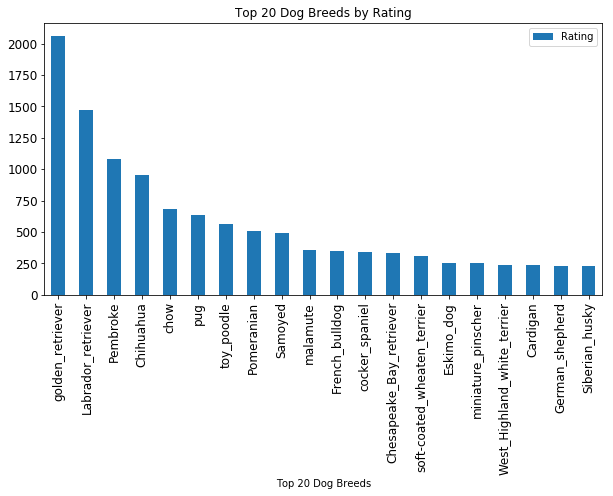

In [93]:
#pick the top 20 breeds by rating from the above dataframe and plot a bar gragh
#discarding the unidentified breed
x = groupby_breed.iloc[1:21,0]
y = groupby_breed.iloc[1:21,7]

top20_breed=pd.DataFrame({'Breed':x,'Rating':y})
ax = top20_breed[['Rating']].plot(kind='bar',figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel('Top 20 Dog Breeds')
ticks=np.arange(len(x))
plt.xticks(ticks,x)
plt.title('Top 20 Dog Breeds by Rating')
plt.show()


**Top breeds by favorite count**


In [94]:
#group by breeds and then sort them by rating numerator

groupby_breed = df_master.groupby('dog_breed').sum().reset_index()
groupby_breed.sort_values('favorite_count',inplace=True,ascending=False)

**The below is the order of breeds by favorite count:**

In [95]:
groupby_breed[['dog_breed','favorite_count']]

,dog_breed,favorite_count
65,Unidentified,2188049.0
90,golden_retriever,1938038.0
37,Labrador_retriever,1255008.0
49,Pembroke,1043268.0
16,Chihuahua,767827.0
23,French_bulldog,609433.0
55,Samoyed,575104.0
82,chow,451480.0
84,cocker_spaniel,409426.0
102,pug,378008.0



** Bar plot for top 20 breeds by favorite count **<a name="topfav"></a>

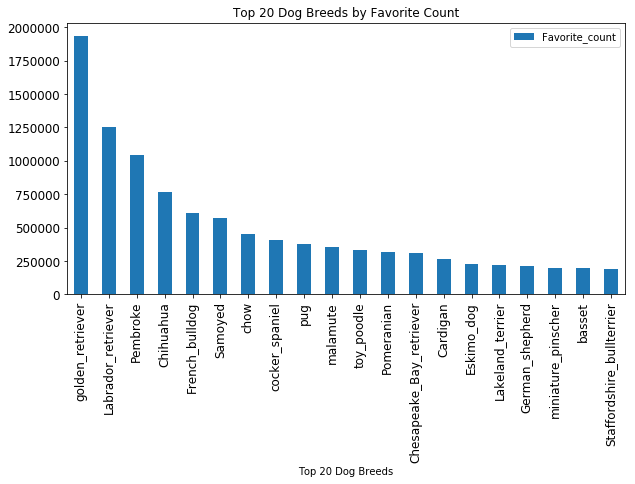

In [96]:
#pick the top 20 breeds by from the above dataframe and plot a bar gragh
#discarding the unidentified breed
x = groupby_breed.iloc[1:21,0]
y = groupby_breed.iloc[1:21,10]
ticks = np.arange(len(x))
top20_breed=pd.DataFrame({'Breed':x,'Favorite_count':y})
ax = top20_breed[['Favorite_count']].plot(kind='bar',figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel('Top 20 Dog Breeds')
plt.xticks(ticks,x)
plt.title('Top 20 Dog Breeds by Favorite Count')
plt.show()


** Retweet and Favorite count by dog stages**<a name="dogstages"></a>

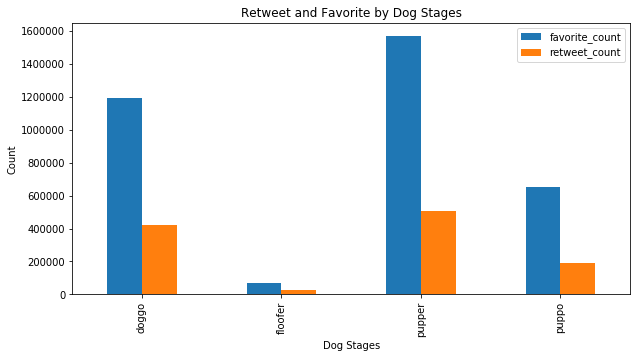

In [97]:
# group by dog stages and plot bar graph for favorite and retweet counts
df_master.groupby('dog_stages')['favorite_count','retweet_count'].sum().plot(kind='bar',figsize=(10,5))
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Retweet and Favorite by Dog Stages')
plt.show()

**Notes:**
of the four stages, pupper had the most favorite and retweet counts followed by doggo. Out of the 1994 tweets
there were only 326 dog stages entries. This result might vary if we had all tweets with dog stages.

**Which month has the most tweets?** <a name="month"></a>

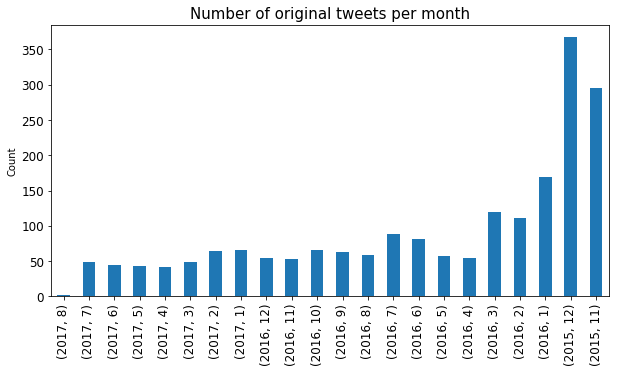

In [98]:
#group by year and by month. then plot the bar graph
groupby_month = df_master.groupby(['year','month'],sort=False)['tweet_id'].count().plot(kind='bar',figsize=(10, 5),fontsize=12)
                                                             
plt.title('Number of original tweets per month',fontsize=15)

plt.ylabel('Count')
plt.xlabel('')
plt.show()


**Notes:**<br>
The bar plot shows that towards the end of 2015(i.e, November & December) and the begining of 2016(January) werer the busiest months with the data we collected. <br>
In the year 2016, beginging(first quater) seem to be busier than the others.<br>
In the year 2017 the number of tweets didn't even exceed 100.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])


0